In [1]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import datetime

In [6]:
data = pd.read_csv('./saved_data/data.csv', sep=';')

In [7]:
data

,Time (DD.MM.YYYY HH:MM:SS),name,CPU usage [%],vCPU [units]
0,01.01.2024 01:00:00,SRVDB1797,23.98,16.0
1,01.01.2024 02:00:00,SRVDB1797,11.50,16.0
2,01.01.2024 03:00:00,SRVDB1797,11.33,16.0
3,01.01.2024 04:00:00,SRVDB1797,11.16,16.0
4,01.01.2024 05:00:00,SRVDB1797,11.14,16.0
...,...,...,...,...
2898,30.04.2024 19:00:00,SRVDB1797,5.86,16.0
2899,30.04.2024 20:00:00,SRVDB1797,6.69,16.0
2900,30.04.2024 21:00:00,SRVDB1797,5.63,16.0
2901,30.04.2024 22:00:00,SRVDB1797,8.32,16.0


In [8]:
data.columns

Index(['Time (DD.MM.YYYY HH:MM:SS)', 'name', 'CPU usage [%]', 'vCPU [units]'], dtype='object')

In [9]:
data = data.drop(columns=['name', 'vCPU [units]'])

In [10]:
nan_inds = data[data['CPU usage [%]'].isna()]

In [11]:
data=data.fillna(data['CPU usage [%]'].median())

In [12]:
nan_inds

,Time (DD.MM.YYYY HH:MM:SS),CPU usage [%]
219,10.01.2024 04:00:00,NaN


In [13]:
data[200:250]

,Time (DD.MM.YYYY HH:MM:SS),CPU usage [%]
200,09.01.2024 09:00:00,11.52
201,09.01.2024 10:00:00,13.46
202,09.01.2024 11:00:00,18.48
203,09.01.2024 12:00:00,19.83
204,09.01.2024 13:00:00,17.67
205,09.01.2024 14:00:00,14.11
206,09.01.2024 15:00:00,14.60
207,09.01.2024 16:00:00,14.44
208,09.01.2024 17:00:00,13.70
209,09.01.2024 18:00:00,14.46


In [14]:
data[200:250]

,Time (DD.MM.YYYY HH:MM:SS),CPU usage [%]
200,09.01.2024 09:00:00,11.52
201,09.01.2024 10:00:00,13.46
202,09.01.2024 11:00:00,18.48
203,09.01.2024 12:00:00,19.83
204,09.01.2024 13:00:00,17.67
205,09.01.2024 14:00:00,14.11
206,09.01.2024 15:00:00,14.60
207,09.01.2024 16:00:00,14.44
208,09.01.2024 17:00:00,13.70
209,09.01.2024 18:00:00,14.46


In [15]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2903)]



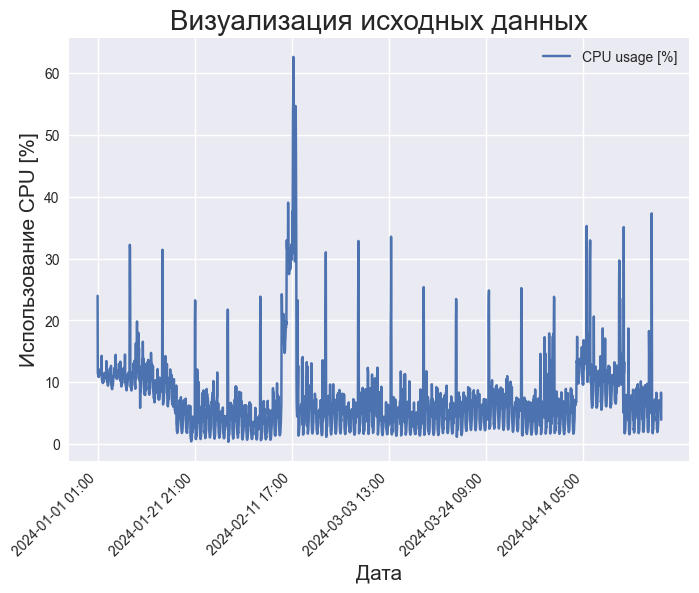

In [16]:
ax = data.plot()

xticks = range(0, len(date_list_for_x), 500)
xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Установка заголовков
ax.set_title('Визуализация исходных данных', fontsize=20)
ax.set_xlabel('Дата', fontsize=15)
ax.set_ylabel('Использование CPU [%]', fontsize=15)

plt.show()

## Фильтрация датасета и обнаружение аномальных точек в тренировочных данных

In [17]:
window_size = 12
# fir_coeffs = [1/window_size for _ in range(window_size)]

Ниже мы вырезаем из данных две заведомо аномальные области: пик между индексами 940 и 1026 и область между индексами 2470 и 2740. Небольшую аномальную область в начале мы решили оставить, т.к. по датам видно, что рост активности вызван новогодними каникулами.

In [18]:
anomaly_areas_inds = [940, 1026, 2470, 2740]

In [19]:
data_no_peaks = pd.concat([data.iloc[:anomaly_areas_inds[0]],
                           data.iloc[anomaly_areas_inds[1]:anomaly_areas_inds[2]],
                           data.iloc[anomaly_areas_inds[3]:]], ignore_index=True)
print(data_no_peaks)

     Time (DD.MM.YYYY HH:MM:SS)  CPU usage [%]
0           01.01.2024 01:00:00          23.98
1           01.01.2024 02:00:00          11.50
2           01.01.2024 03:00:00          11.33
3           01.01.2024 04:00:00          11.16
4           01.01.2024 05:00:00          11.14
...                         ...            ...
2542        30.04.2024 19:00:00           5.86
2543        30.04.2024 20:00:00           6.69
2544        30.04.2024 21:00:00           5.63
2545        30.04.2024 22:00:00           8.32
2546        30.04.2024 23:00:00           3.93

[2547 rows x 2 columns]


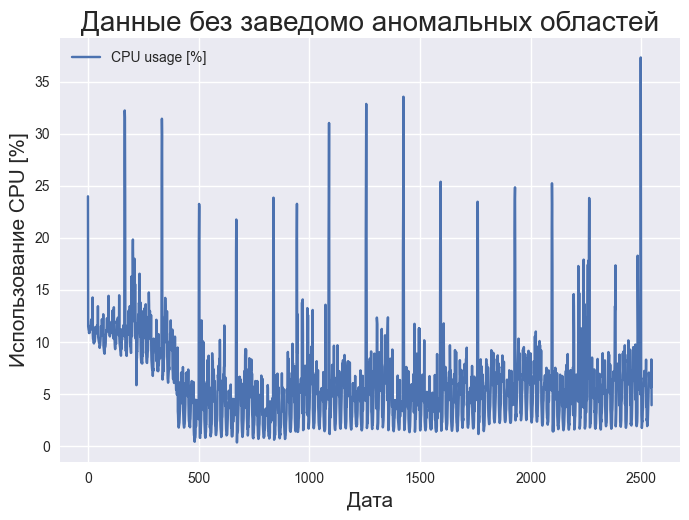

In [20]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=0)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2547)]

ax = data_no_peaks.plot()

# xticks = range(0, len(date_list_for_x), 500)
# xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels, rotation=45, ha='right')

ax.set_title('Данные без заведомо аномальных областей', fontsize=20)
ax.set_xlabel('Дата', fontsize=15)
ax.set_ylabel('Использование CPU [%]', fontsize=15)

plt.show()

С помощью фильтрации и построения доверительного интервала найдем аномалии в тренировочных данных, чтобы затем обучить на них классификационную модель. Аномалиями (кроме заведомо аномальных областей, вырезанных ранее и не имеющих сезонного тренда) мы считаем "пики" с интервалом в неделю и некоторые значения вокруг них.

In [21]:
data_filtered = data_no_peaks.copy()
data_filtered['CPU usage [%]'] = data_no_peaks['CPU usage [%]'].rolling(window=window_size, min_periods=0).mean()
data_filtered['CPU usage [%]'][0] -= data_filtered['CPU usage [%]'].median()


C:\Users\ndroz\AppData\Local\Temp\ipykernel_27944\2542348472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['CPU usage [%]'][0] -= data_filtered['CPU usage [%]'].median()


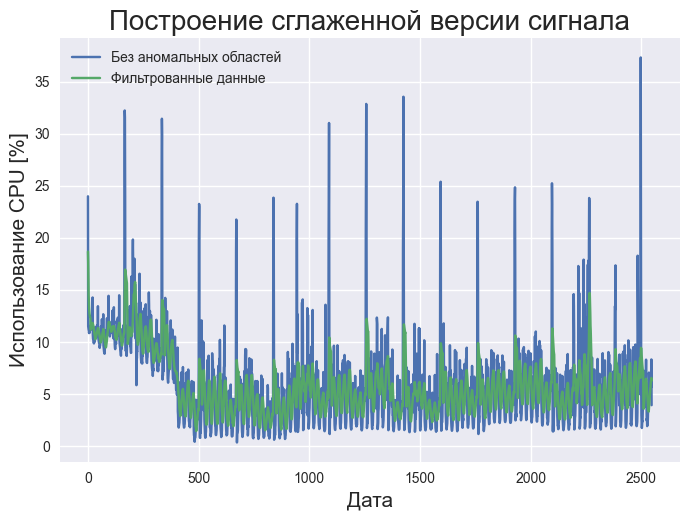

In [22]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2547)]


plt.plot(data_no_peaks['CPU usage [%]'], label='Без аномальных областей')
plt.plot(data_filtered['CPU usage [%]'], label='Фильтрованные данные')

# xticks = range(0, len(date_list_for_x), 500)
# xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

# plt.xticks(xticks, xticklabels, rotation=45, ha='right')


plt.title('Построение сглаженной версии сигнала', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Использование CPU [%]', fontsize=15)
plt.legend()

plt.show()

Построим доверительный интервал:

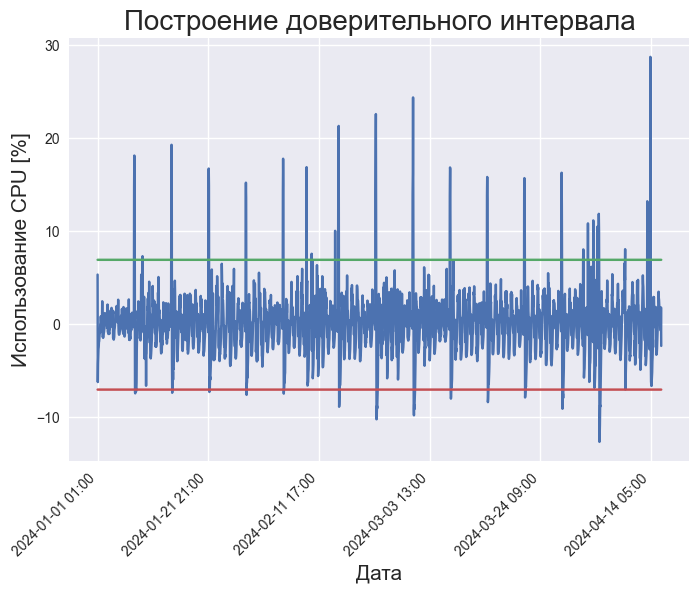

In [23]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2547)]

err = data_no_peaks['CPU usage [%]'] - data_filtered['CPU usage [%]']
plt.plot(err)
plt.plot((np.median(err) + 2 * np.std(err)) * np.ones_like(np.abs(err)))
plt.plot((np.median(err) - 2 * np.std(err))* np.ones_like(np.abs(err)))
xticks = range(0, len(date_list_for_x), 500)
xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

plt.xticks(xticks, xticklabels, rotation=45, ha='right')

plt.title('Построение доверительного интервала', fontsize = 20)
plt.xlabel('Дата', fontsize = 15)
plt.ylabel('Использование CPU [%]', fontsize = 15)
plt.show()

In [24]:
err_mean = np.median(err)
thr1 = err_mean + 2 * np.std(err)
thr2 = err_mean - 2 * np.std(err)

In [25]:
ind1 = data_no_peaks[err > thr1].index

In [26]:
ind2 = data_no_peaks[err < thr2].index

In [27]:
inds_to_remove = pd.concat([pd.Series(ind1), pd.Series(ind2)])

In [28]:
data_no_peaks_wo_anom = data_no_peaks.drop(index=inds_to_remove)
data_no_peaks_wo_anom

,Time (DD.MM.YYYY HH:MM:SS),CPU usage [%]
0,01.01.2024 01:00:00,23.98
1,01.01.2024 02:00:00,11.50
2,01.01.2024 03:00:00,11.33
3,01.01.2024 04:00:00,11.16
4,01.01.2024 05:00:00,11.14
...,...,...
2542,30.04.2024 19:00:00,5.86
2543,30.04.2024 20:00:00,6.69
2544,30.04.2024 21:00:00,5.63
2545,30.04.2024 22:00:00,8.32


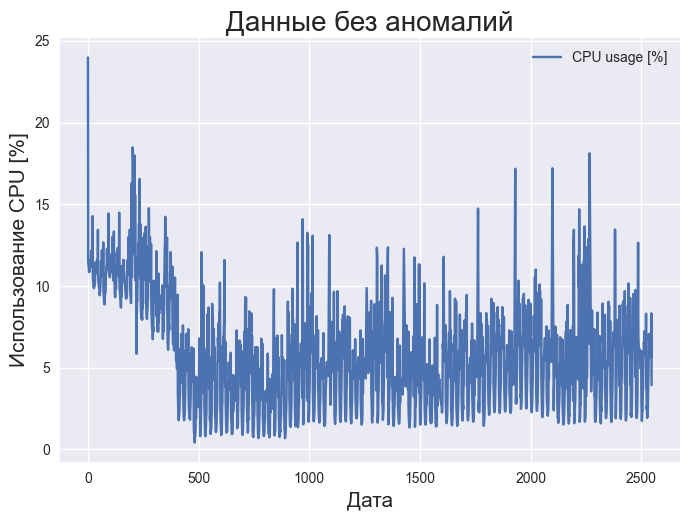

In [29]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2547)]

data_no_peaks_wo_anom.plot()

# xticks = range(0, len(date_list_for_x), 500)
# xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

# plt.xticks(xticks, xticklabels, rotation=45, ha='right')

plt.title('Данные без аномалий', fontsize = 20)
plt.xlabel('Дата', fontsize = 15)
plt.ylabel('Использование CPU [%]', fontsize = 15)
plt.show()

## XGBoost for anomaly detection

Обучим модель градиентного бустинга под найденные ранее аномалии на тренировочных данных.

In [30]:
import xgboost as xgb

In [31]:
data_gb_r = data_no_peaks.copy()

In [32]:
data_gb_r.columns

Index(['Time (DD.MM.YYYY HH:MM:SS)', 'CPU usage [%]'], dtype='object')

In [33]:
gbr_target = np.zeros(data_no_peaks.shape[0])

In [34]:
gbr_target[inds_to_remove] = 1

### Создание признаков для модели

In [35]:
time_index = pd.to_datetime(data_gb_r['Time (DD.MM.YYYY HH:MM:SS)'], format='%d.%m.%Y %H:%M:%S')
time_index_name = 'Time (DD.MM.YYYY HH:MM:SS)'

In [36]:
data_gb_r.insert(1, 'hour', time_index.dt.hour)
data_gb_r.insert(2, 'day', time_index.dt.day)
data_gb_r.insert(3, 'month', time_index.dt.month)
data_gb_r.insert(4, 'dayofweek', time_index.dt.dayofweek)

In [37]:
data_gb_r

,Time (DD.MM.YYYY HH:MM:SS),hour,day,month,dayofweek,CPU usage [%]
0,01.01.2024 01:00:00,1,1,1,0,23.98
1,01.01.2024 02:00:00,2,1,1,0,11.50
2,01.01.2024 03:00:00,3,1,1,0,11.33
3,01.01.2024 04:00:00,4,1,1,0,11.16
4,01.01.2024 05:00:00,5,1,1,0,11.14
...,...,...,...,...,...,...
2542,30.04.2024 19:00:00,19,30,4,1,5.86
2543,30.04.2024 20:00:00,20,30,4,1,6.69
2544,30.04.2024 21:00:00,21,30,4,1,5.63
2545,30.04.2024 22:00:00,22,30,4,1,8.32


In [38]:
data_gb_r = data_gb_r.drop(columns=[time_index_name]).rename(columns={'CPU usage [%]':'cpu'})
data_gb_r

,hour,day,month,dayofweek,cpu
0,1,1,1,0,23.98
1,2,1,1,0,11.50
2,3,1,1,0,11.33
3,4,1,1,0,11.16
4,5,1,1,0,11.14
...,...,...,...,...,...
2542,19,30,4,1,5.86
2543,20,30,4,1,6.69
2544,21,30,4,1,5.63
2545,22,30,4,1,8.32


In [77]:
gbr_target = pd.Series(gbr_target)

In [78]:
data_x = data_gb_r
data_target = gbr_target


In [79]:
xgb_r = xgb.XGBClassifier(n_estimators=1000)
xgb_r.fit(data_x, data_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
target_pred = xgb_r.predict(data_x)

"Подчищать" предсказания-выбросы будем с помощью пороговой фильтрации по медианному значению загрузки CPU.

In [81]:
thr_outl = max(np.median(gbr_target), 10)

График найденных аномалий (данные с удаленными "аномальными областями"):

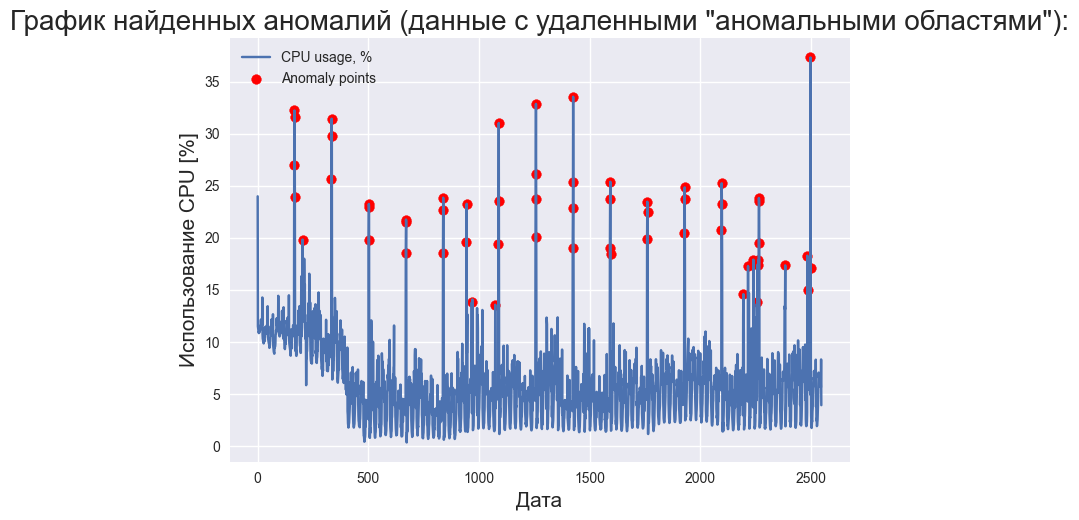

In [83]:
anomaly_inds = target_pred > 0
anomaly_inds *= data_no_peaks['CPU usage [%]'] > thr_outl
plt.plot(data_no_peaks['CPU usage [%]'], label='CPU usage, %')
# xticks = range(0, len(date_list_for_x), 500)
# xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

# plt.xticks(xticks, xticklabels, rotation=45, ha='right')

plt.scatter(pd.Series(data_no_peaks['CPU usage [%]'][anomaly_inds].index), data_no_peaks['CPU usage [%]'][anomaly_inds], color='r', label='Anomaly points')
plt.title('График найденных аномалий (данные с удаленными "аномальными областями"):', fontsize = 20)
plt.xlabel('Дата', fontsize = 15)
plt.ylabel('Использование CPU [%]', fontsize = 15)
plt.legend()
plt.show()

График предсказанных аномалий с учетом заранее аномальных областей (вырезанных вручную):

In [45]:
anomaly_inds = target_pred > 0
anomaly_inds = np.insert(anomaly_inds, np.arange(940, 1026), True, axis=0)

In [46]:
anomaly_inds_1 = np.ones(2903).astype('bool')
anomaly_inds_1[:2470] = anomaly_inds[:2470]
anomaly_inds_1[2740:] = anomaly_inds[2470:]

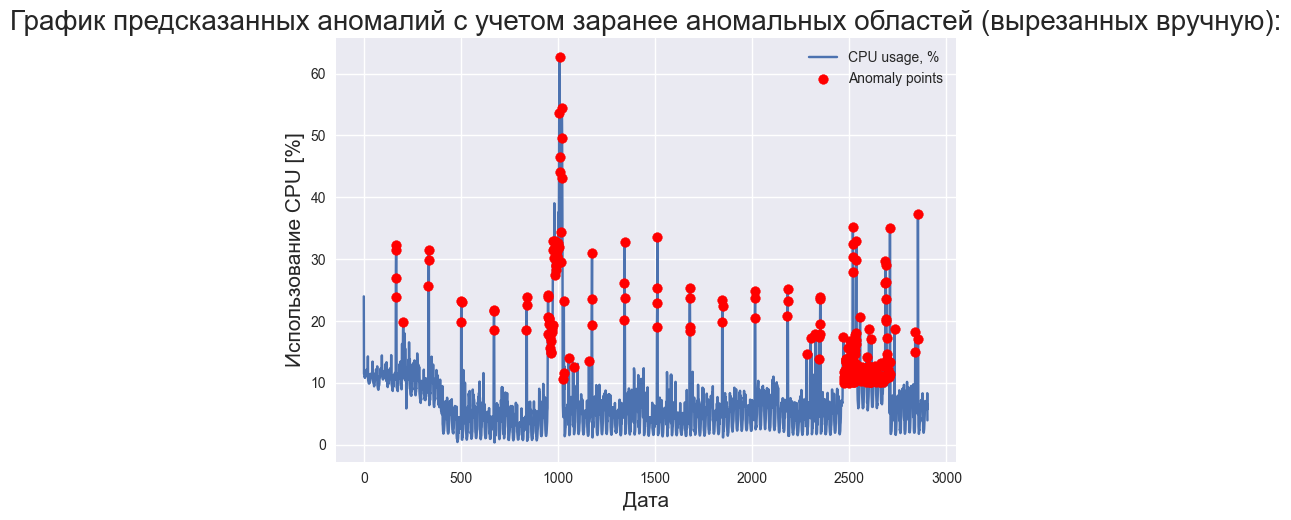

In [75]:
anomaly_inds_1 *= data['CPU usage [%]'] > thr_outl
plt.plot(data['CPU usage [%]'], label='CPU usage, %')
plt.scatter(pd.Series(data['CPU usage [%]'][anomaly_inds_1].index), data['CPU usage [%]'][anomaly_inds_1], color='r', zorder=2, label='Anomaly points')
# xticks = range(0, len(date_list_for_x), 500)
# xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

# plt.xticks(xticks, xticklabels, rotation=45, ha='right')

plt.title('График предсказанных аномалий с учетом заранее аномальных областей (вырезанных вручную):', fontsize = 20)
plt.xlabel('Дата', fontsize = 15)
plt.ylabel('Использование CPU [%]', fontsize = 15)
plt.legend()
plt.show()

## XGBoost для предсказания следующих значений

In [48]:
import datetime

Предскажем значения на май:

In [49]:
base = datetime.datetime(day=1, month=5, year=2024, hour=0)
date_list = [base + datetime.timedelta(hours=x) for x in range(744)]

In [50]:
test_data_x = pd.DataFrame()

In [51]:
date_list = pd.Series(date_list)

In [52]:
test_data_x.insert(0, 'hour', date_list.dt.hour)
test_data_x.insert(1, 'day', date_list.dt.day)
test_data_x.insert(2, 'month', date_list.dt.month)
test_data_x.insert(3, 'dayofweek', date_list.dt.dayofweek)


Предсказательная модель должна выдавать в т.ч. и сезонные еженедельные аномалии. Обучим эту модель на наборе данных data_no_peaks.

In [53]:
xgb_forecast = xgb.XGBRegressor(n_estimators=100)

In [54]:
data_x_f = data_gb_r[['hour', 'day', 'month', 'dayofweek']]
data_target_f = data_gb_r['cpu']

In [55]:
xgb_forecast.fit(data_x_f, data_target_f)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
plot_target = data['CPU usage [%]']

In [57]:
target_pred_may = xgb_forecast.predict(test_data_x)

In [58]:
all_target = pd.concat([pd.Series(plot_target), pd.Series(target_pred_may)], ignore_index=True)

In [59]:
full_target = np.concatenate([all_target, plot_target], axis = 0)
full_target

array([23.98, 11.5 , 11.33, ...,  5.63,  8.32,  3.93])

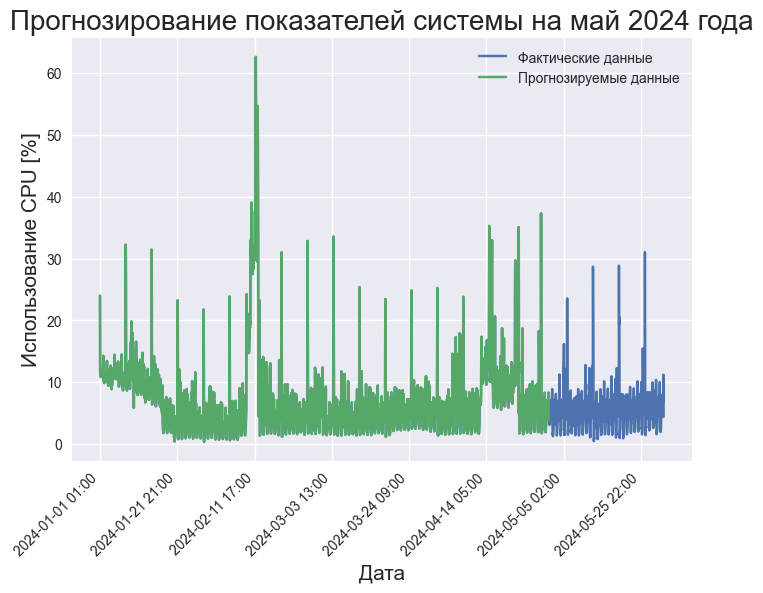

In [60]:
x_base = datetime.datetime(day=1, month=1, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(2903)]

additional_dates_base = datetime.datetime(day=1, month=5, year=2024, hour=1)
date_list = [additional_dates_base + datetime.timedelta(hours=x) for x in range(744)]

plt.plot(all_target, label='Фактические данные')
plt.plot(plot_target, label='Прогнозируемые данные')

full_date_list = list(date_list_for_x) + list(date_list)

xticks = range(0, len(full_date_list), 500)
xticklabels = [full_date_list[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

plt.xticks(xticks, xticklabels, rotation=45, ha='right')

plt.title('Прогнозирование показателей системы на май 2024 года', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Использование CPU [%]', fontsize=15)
plt.legend()

plt.show()

## Проанализируем аномалии на спрогнозированных данных

In [61]:
test_data_x['cpu'] = target_pred_may

In [62]:
target_pred = xgb_r.predict(test_data_x)

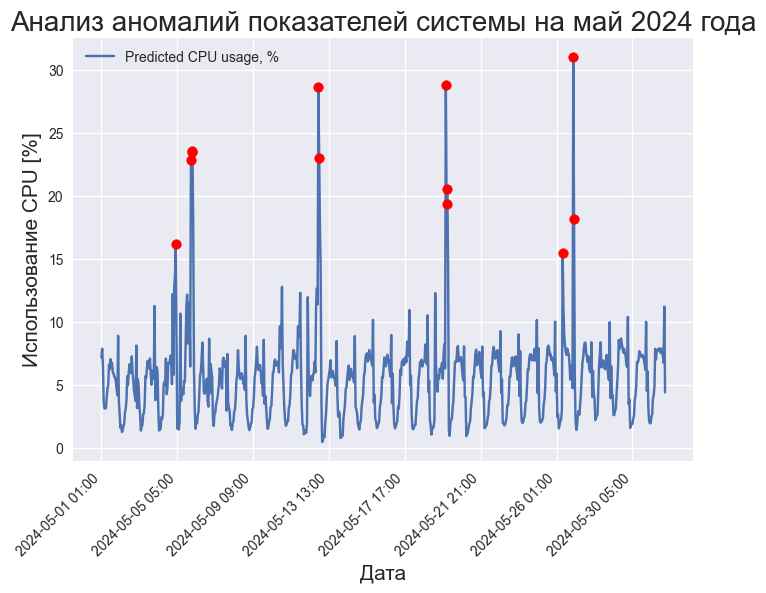

In [63]:
anomaly_inds = target_pred > 0
anomaly_inds *= target_pred_may > thr_outl

x_base = datetime.datetime(day=1, month=5, year=2024, hour=1)
date_list_for_x = [x_base + datetime.timedelta(hours=x) for x in range(744)]

# additional_dates_base = datetime.datetime(day=1, month=4, year=2024, hour=1)
# date_list = [additional_dates_base + datetime.timedelta(hours=x) for x in range(2547)]

plt.plot(target_pred_may, label='Predicted CPU usage, %')

# full_date_list = list(date_list_for_x) + list(date_list)

xticks = range(0, len(date_list_for_x), 100)
xticklabels = [date_list_for_x[i].strftime('%Y-%m-%d %H:%M') for i in xticks]

plt.xticks(xticks, xticklabels, rotation=45, ha='right')

anomaly_inds_2 = target_pred > 0
thr2 = max(np.median(target_pred_may), 10)
anomaly_inds_2 *= target_pred_may > thr2
target_pred_may = pd.Series(target_pred_may)
plt.scatter(pd.Series(target_pred_may[anomaly_inds_2].index), target_pred_may[anomaly_inds_2], color='r', zorder=2)

plt.title('Анализ аномалий показателей системы на май 2024 года', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Использование CPU [%]', fontsize=15)
plt.legend()

plt.show()

## Сохраняем модельки и данные

In [64]:
import pickle

In [65]:
with open('./models/filename_detector.pickle', 'wb') as f:
    pickle.dump(xgb_r, f)

In [66]:
with open('./models/filename_forecaster.pickle', 'wb') as f:
    pickle.dump(xgb_forecast, f)

In [67]:
with open('./saved_data/train_data.pickle', 'wb') as f:
    pickle.dump(data, f)

In [68]:
with open('./saved_data/train_anom.pickle', 'wb') as f:
    pickle.dump(anomaly_inds_1, f)

In [69]:
import pandas as pd

## Обработка тестовых данных

Обработаем тестовые данные, сам предикшн будет внесен в приложение.

In [70]:
data_test = pd.read_csv('./saved_data/anomalies_check.csv', sep=';')

In [71]:
data_test

,Time (DD.MM.YYYY HH:MM:SS),name,CPU usage [%],vCPU [units]
0,01.05.2024 00:00:00,SRVDB1797,6.71,16.0
1,01.05.2024 01:00:00,SRVDB1797,1.87,16.0
2,01.05.2024 02:00:00,SRVDB1797,1.58,16.0
3,01.05.2024 03:00:00,SRVDB1797,1.42,16.0
4,01.05.2024 04:00:00,SRVDB1797,1.38,16.0
...,...,...,...,...
525,22.05.2024 21:00:00,SRVDB1797,2.74,16.0
526,22.05.2024 22:00:00,SRVDB1797,5.85,16.0
527,22.05.2024 23:00:00,SRVDB1797,1.75,16.0
528,23.05.2024 00:00:00,SRVDB1797,3.82,16.0


In [72]:
data_test.columns

Index(['Time (DD.MM.YYYY HH:MM:SS)', 'name', 'CPU usage [%]', 'vCPU [units]'], dtype='object')

In [73]:
data_test = data_test.drop(columns=['name', 'vCPU [units]'])

In [74]:
with open('./saved_data/test_data.pickle', 'wb') as f:
    pickle.dump(data_test, f)